In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the csv file

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Check missing values

In [4]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Seperate X and Y

In [5]:
X = df.drop(columns=['id','Machine failure'])
Y = df[['Machine failure']]


In [6]:
X.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [8]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

### Cat con seperation for X

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Product ID', 'Type']

In [11]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a preprocessing pipeline
Cat - OrdinalEncoder

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])

In [14]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 3.95880302e-01, -2.46230381e-01,  5.45415917e-01, ...,
        -4.75677701e-02,  2.75200000e+03,  1.00000000e+00],
       [ 1.46985559e+00,  1.55860483e+00,  1.72030819e+00, ...,
        -4.75677701e-02,  8.62000000e+03,  2.00000000e+00],
       [-3.02203631e-01, -1.04035788e+00,  2.05187289e+00, ...,
        -4.75677701e-02,  2.34400000e+03,  1.00000000e+00],
       ...,
       [ 3.42181538e-01,  1.34202461e+00,  2.64450956e-02, ...,
        -4.75677701e-02,  5.50200000e+03,  1.00000000e+00],
       [ 9.86566708e-01,  6.92283930e-01, -5.28565366e-01, ...,
        -4.75677701e-02,  5.02400000e+03,  1.00000000e+00],
       [-1.59097397e+00, -1.32913151e+00,  2.64306722e-01, ...,
        -4.75677701e-02,  1.45300000e+03,  1.00000000e+00]])

In [15]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Product ID', 'cat__Type'],
      dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Product ID,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2752.0,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,8620.0,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2344.0,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,4704.0,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,9727.0,2.0


### Feature selection with Mutual Information scores

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00518997, 0.00197764, 0.01910525, 0.01988956, 0.00670337,
       0.00790675, 0.02419327, 0.0111933 , 0.0192955 , 0.00125688,
       0.01802229, 0.01149069])

In [18]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024193
num__Torque [Nm]                0.019890
num__OSF                        0.019296
num__Rotational speed [rpm]     0.019105
cat__Product ID                 0.018022
cat__Type                       0.011491
num__PWF                        0.011193
num__TWF                        0.007907
num__Tool wear [min]            0.006703
num__Air temperature [K]        0.005190
num__Process temperature [K]    0.001978
num__RNF                        0.001257
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

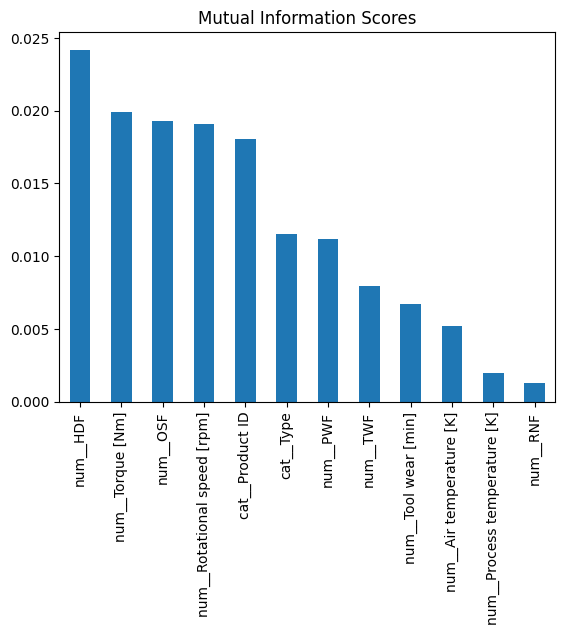

In [19]:
mi.plot(kind='bar', title='Mutual Information Scores')

In [21]:
sel_cols = list(mi.index[0:7])
sel_cols

['num__HDF',
 'num__Torque [Nm]',
 'num__OSF',
 'num__Rotational speed [rpm]',
 'cat__Product ID',
 'cat__Type',
 'num__PWF']

In [23]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=7)
sel_features = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()

In [24]:
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF', 'cat__Product ID', 'cat__Type'],
      dtype=object)

### Extract important column names

In [25]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [26]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [27]:
imp_cols

['Rotational speed [rpm]',
 'Torque [Nm]',
 'HDF',
 'PWF',
 'OSF',
 'Product ID',
 'Type']

In [28]:
X_sel = X[imp_cols]
X_sel

,Rotational speed [rpm],Torque [Nm],HDF,PWF,OSF,Product ID,Type
0,1596,36.1,0,0,0,L50096,L
1,1759,29.1,0,0,0,M20343,M
2,1805,26.5,0,0,0,L49454,L
3,1524,44.3,0,0,0,L53355,L
4,1641,35.4,0,0,0,M24050,M
...,...,...,...,...,...,...,...
136424,1530,37.5,0,0,0,M22284,M
136425,1447,49.1,0,0,0,H38017,H
136426,1524,38.5,0,0,0,L54690,L
136427,1447,46.3,0,0,0,L53876,L


### Create a final pipeline 
Cat - OneHotEncoder

In [29]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [30]:
cat_sel

['Product ID', 'Type']

In [31]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [34]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.54541592, -0.49971115, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.72030819, -1.32302768, -0.07202055, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.05187289, -1.62883096, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.0264451 , -0.2174312 , -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52856537,  0.69997864, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26430672, -0.12333789, -0.07202055, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF', ...,
       'cat__Type_H', 'cat__Type_L', 'cat__Type_M'], dtype=object)

In [36]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF,cat__Product ID_H29424,cat__Product ID_H29425,cat__Product ID_H29432,cat__Product ID_H29434,cat__Product ID_H29441,...,cat__Product ID_M24846,cat__Product ID_M24847,cat__Product ID_M24849,cat__Product ID_M24851,cat__Product ID_M24855,cat__Product ID_M24857,cat__Product ID_M24859,cat__Type_H,cat__Type_L,cat__Type_M
0,0.545416,-0.499711,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.720308,-1.323028,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.051873,-1.628831,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.026445,0.464745,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.869773,-0.582043,-0.072021,-0.049016,-0.063038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train Test Split
80% train 

20% test 

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [39]:
xtrain.shape

(109143, 9984)

In [40]:
xtest.shape

(27286, 9984)

### Algo Evaluation

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [5]:
dct = {'Logistic': LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),}

In [7]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [10]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name,model in dct.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate F1 score in training
    f1_tr = f1_score(ytrain, ypred_tr)
    tr.append(f1_tr)
    # Calculate F1 Score in train Cross validated
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)
    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)
    ts.append(f1_ts)
    # Print the results for model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Training F1 CV : {f1_cv:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n=================================================\n')

NameError: name 'xtrain' is not defined